In [17]:
# Importação dos pacotes
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree

# Seed para reprodução de resultados
seed = 1
random.seed(seed)
np.random.seed(seed)

In [2]:
data = pd.read_table('Datasets/credito.txt')
data.head()

,ESTC,NDEP,RENDA,TIPOR,VBEM,NPARC,VPARC,TEL,IDADE,RESMS,ENTRADA,CLASSE
0,1,0,360,0,313,9,52,0,25,48,0,1
1,0,0,350,1,468,10,65,0,33,6,0,1
2,0,0,1100,0,829,9,125,0,56,48,0,1
3,0,0,3000,0,552,12,76,1,31,60,0,1
4,1,0,1000,0,809,12,111,0,24,7,0,1


In [15]:
# Separando treino e teste

X = data.loc[:,data.columns != 'CLASSE']  # Entrada
y = data.CLASSE    # Saída
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    stratify=y)         # fazer amostragem estratificada. manter a proporção dos dados

In [16]:
# definindo função de treino do modelo

def train(X_train, y_train, seed):
  model = RandomForestClassifier(random_state=seed,
                                  max_depth=15,
                                  min_samples_leaf=3) # tente mudar parâmetro para evitar overfitting
  model.fit(X_train, y_train);
  return model

In [19]:
# treinando modelo

model = train(X_train, y_train, seed)

In [24]:
# profundidade da árvore
model.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(max_depth=15, min_samples_leaf=3, random_state=1)>

Resultados de Treino
Acurácia:  0.9409993979530403
Kappa:  0.8810865540975894
F1:  0.9343163538873995


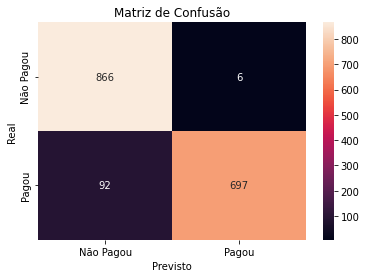

Resultados de Teste
Acurácia:  0.9086538461538461
Kappa:  0.8153831780066803
F1:  0.8956043956043956


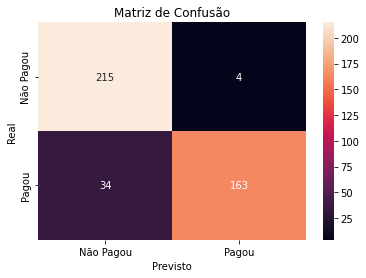

In [25]:
# Avaliando modelo

def predict_and_evaluate(model, X_test, y_test):

  # inferência do teste
  y_pred = model.predict(X_test) 

  # Acurácia
  from sklearn.metrics import accuracy_score
  accuracy = accuracy_score(y_test, y_pred)
  print('Acurácia: ', accuracy)

  # Kappa
  from sklearn.metrics import cohen_kappa_score
  kappa = cohen_kappa_score(y_test, y_pred)
  print('Kappa: ', kappa)

  # F1
  from sklearn.metrics import f1_score
  f1 = f1_score(y_test, y_pred)
  print('F1: ', f1)

  # Matriz de confusão
  from sklearn.metrics import confusion_matrix
  confMatrix = confusion_matrix(y_test, y_pred)

  ax = plt.subplot()
  sns.heatmap(confMatrix, annot=True, fmt=".0f")
  plt.xlabel('Previsto')
  plt.ylabel('Real')
  plt.title('Matriz de Confusão')

  # Colocar os nomes
  ax.xaxis.set_ticklabels(['Não Pagou', 'Pagou']) 
  ax.yaxis.set_ticklabels(['Não Pagou', 'Pagou'])
  plt.show()

print('Resultados de Treino')
predict_and_evaluate(model, X_train, y_train)
print('Resultados de Teste')
predict_and_evaluate(model, X_test, y_test)

In [26]:
# Normalizando

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Resultados de Treino
Acurácia:  0.9409993979530403
Kappa:  0.8810865540975894
F1:  0.9343163538873995


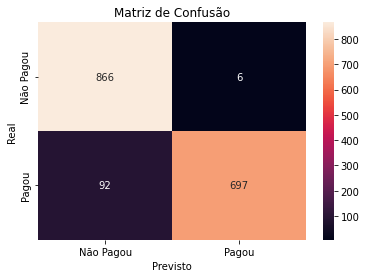

Resultados de Teste
Acurácia:  0.9086538461538461
Kappa:  0.8153831780066803
F1:  0.8956043956043956


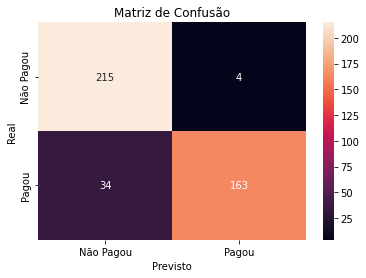

In [27]:
# Treinar e Testar novamente
model = train(X_train, y_train, seed)
print('Resultados de Treino')
predict_and_evaluate(model, X_train, y_train)
print('Resultados de Teste')
predict_and_evaluate(model, X_test, y_test)

In [28]:
# Grid Search

from sklearn.model_selection import GridSearchCV

# Definir parâmetros a serem utilizados
tuned_parameters = [{'n_estimator': 
                     'criterion': ['gini', 'entropy'],
                     'max_depth': [2,4,5,6,8,10,12],
                     'min_samples_leaf': [1, 2, 3, 4, 5, 8, 10]}]

# Executar o grid search
model = GridSearchCV(RandomForestClassifier(), tuned_parameters, scoring='f1')
model.fit(X_train, y_train);